### Modelling and Analysis of Complex Networks
## Exercise 6
Name: Rukhsar Ahmed

# First of all we import our dataset using pandas library.

In [1]:
# Dataset Group no.4
import pandas as pd
facebook_edges='414.edges' 
twitter_edges='1046661.edges'

Here we can see that we have two nodes in every row and also notice that these nodes are connected by an edge. First we separate these nodes using numpy library because we have two different network so we apply this process twice.

In [2]:
import networkx as nx  # network x for graph
import matplotlib.pyplot as plt  # for plotting
import networkx.algorithms.community as nxcom  # network x  algorithm
from random import sample  # for randomly choose the node
facebook_network = nx.read_edgelist(facebook_edges, create_using=nx.Graph(), nodetype=int)
twitter_network = nx.read_edgelist(twitter_edges, create_using=nx.DiGraph(), nodetype=int)


# (a) Please randomly choose two sets of nodes in Facebook-Ego dataset (each consists of 50 nodes without repetition), and calculate the cut size and conductance between the two sets of nodes. Please also plot the partitioning.


In [3]:
def random_sample(self):
    # set will take the unique nodes
    nodes_samp = sample(list(self.nodes()), 50)
    return nodes_samp

sample1 = random_sample(facebook_network)
sample2 = random_sample(facebook_network)

print(f"sample 1:\n{sample1}")
print(f"sample 2:\n {sample2}")



sample 1:
[611, 597, 617, 596, 587, 395, 434, 676, 685, 544, 642, 394, 637, 514, 576, 592, 664, 573, 662, 542, 412, 594, 606, 436, 684, 682, 431, 648, 561, 677, 678, 659, 665, 620, 515, 683, 588, 653, 652, 566, 589, 661, 635, 622, 645, 657, 640, 583, 374, 666]
sample 2:
 [597, 641, 434, 600, 559, 461, 553, 348, 588, 576, 492, 684, 173, 394, 515, 618, 640, 646, 661, 593, 685, 665, 670, 423, 577, 496, 681, 395, 678, 475, 666, 427, 650, 579, 575, 675, 612, 617, 655, 561, 601, 673, 592, 611, 603, 596, 574, 652, 649, 604]


In [4]:
def cut_conductance(s1, s2):
    '''
    cutsize:
        The cut size is the sum of the weights of the edges
        “between” the two sets of nodes.

    conductance:
        The conductance is the quotient of the cut size 
        and the smaller of the volumes of the two sets.'''

    c_size = nx.cut_size(facebook_network, s1, s2, weight=None)
    cond = nx.conductance(facebook_network, sample1, sample2)
    print("Cut size between two sample : ", c_size)
    
    cond = nx.conductance(facebook_network, s1, s2)
    print("The conductance betwwen two sample: ", cond)


In [5]:
def partition(G,s1,s2):
  node_groups = [s1,s2]
  fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 20))
  ax1.set_title("Partitioning the facebook network (random Graph")
  ax2.set_title("Partitioning the facebook network ")
  print("Red: ", node_groups[0],"\n\n Yellow:  ",node_groups[1])
  color_map = []
  for node in G:
      if node in node_groups[0]:
          color_map.append('red')
      elif node in node_groups[1]:
          color_map.append('yellow')
      else:
        color_map.append('black') # outside of 100 sample
  nx.draw_random(G, node_color=color_map, with_labels=True,ax=ax1,alpha=0.7)
  nx.draw(G, node_color=color_map, with_labels=True,ax=ax2,alpha=0.7)
  plt.show()

Cut size between two sample :  340
The conductance betwwen two sample:  0.3093721565059145
Red:  [611, 597, 617, 596, 587, 395, 434, 676, 685, 544, 642, 394, 637, 514, 576, 592, 664, 573, 662, 542, 412, 594, 606, 436, 684, 682, 431, 648, 561, 677, 678, 659, 665, 620, 515, 683, 588, 653, 652, 566, 589, 661, 635, 622, 645, 657, 640, 583, 374, 666] 

 Yellow:   [597, 641, 434, 600, 559, 461, 553, 348, 588, 576, 492, 684, 173, 394, 515, 618, 640, 646, 661, 593, 685, 665, 670, 423, 577, 496, 681, 395, 678, 475, 666, 427, 650, 579, 575, 675, 612, 617, 655, 561, 601, 673, 592, 611, 603, 596, 574, 652, 649, 604]


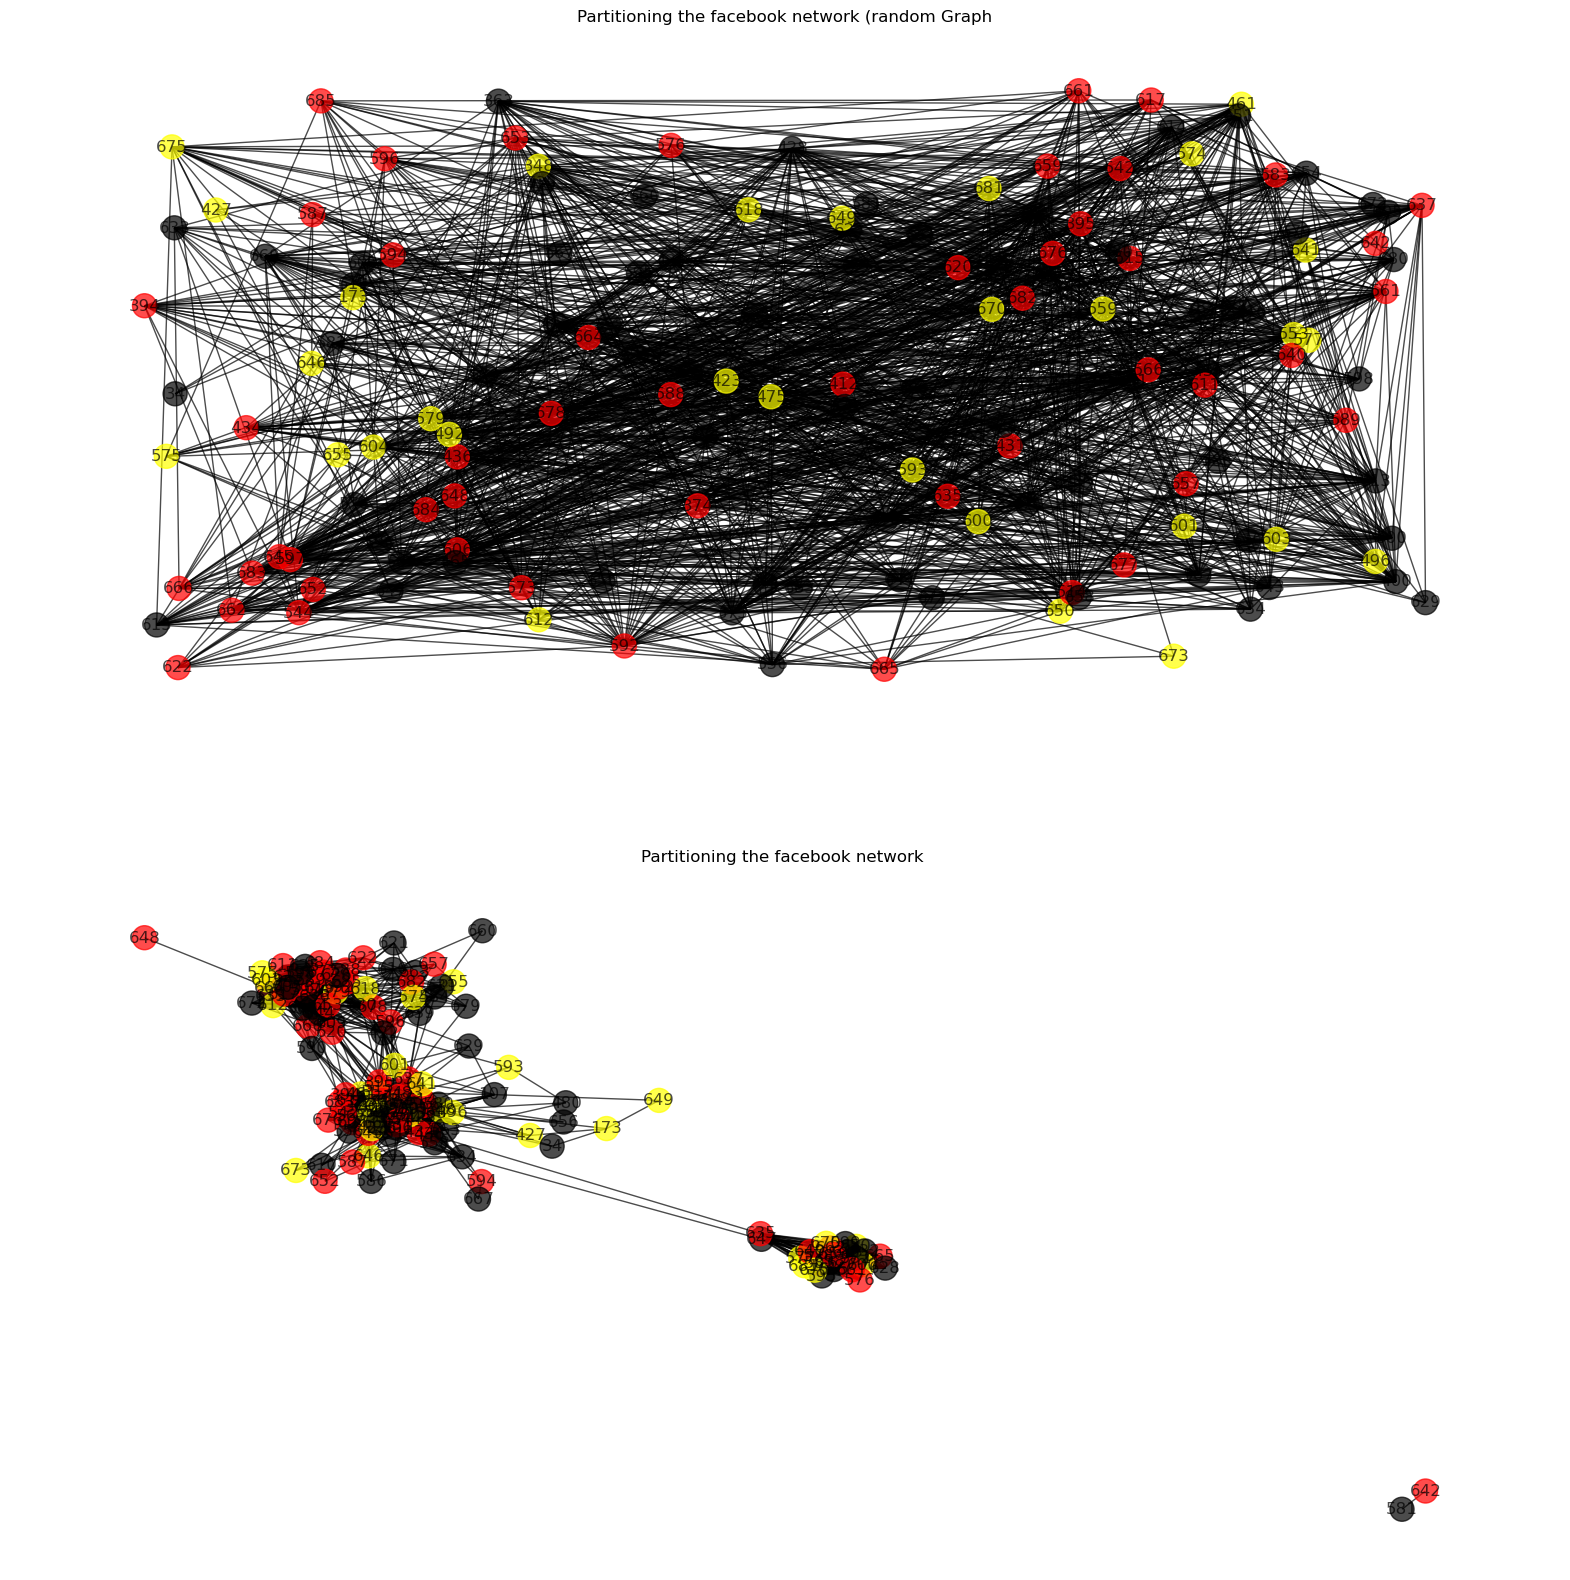

In [6]:
#A) ANswer:
cut_conductance(sample1, sample2);
partition(facebook_network,sample1,sample2);

# (b) Please repeat the process mentioned in (a) again but with different sets of nodes. What differences have you observed? What cause the differences?

In [7]:
sample3 = random_sample(facebook_network)
sample4 = random_sample(facebook_network)

print(f"sample 1:\n{sample3}")
print(f"sample 2:\n{sample4}")


sample 1:
[567, 601, 574, 573, 591, 348, 661, 651, 611, 677, 173, 636, 629, 513, 671, 590, 589, 434, 680, 594, 615, 662, 34, 635, 600, 593, 583, 391, 667, 431, 584, 658, 566, 598, 664, 614, 581, 633, 374, 556, 587, 684, 650, 500, 675, 438, 588, 436, 496, 632]
sample 2:
[590, 582, 628, 363, 581, 492, 612, 633, 646, 660, 475, 623, 667, 642, 465, 666, 575, 496, 611, 670, 591, 616, 669, 654, 566, 663, 619, 394, 641, 513, 587, 376, 579, 639, 173, 648, 604, 627, 506, 609, 675, 593, 662, 438, 684, 650, 576, 370, 664, 630]


Cut size between two sample :  341
The conductance betwwen two sample:  0.3134191176470588
Red:  [567, 601, 574, 573, 591, 348, 661, 651, 611, 677, 173, 636, 629, 513, 671, 590, 589, 434, 680, 594, 615, 662, 34, 635, 600, 593, 583, 391, 667, 431, 584, 658, 566, 598, 664, 614, 581, 633, 374, 556, 587, 684, 650, 500, 675, 438, 588, 436, 496, 632] 

 Yellow:   [590, 582, 628, 363, 581, 492, 612, 633, 646, 660, 475, 623, 667, 642, 465, 666, 575, 496, 611, 670, 591, 616, 669, 654, 566, 663, 619, 394, 641, 513, 587, 376, 579, 639, 173, 648, 604, 627, 506, 609, 675, 593, 662, 438, 684, 650, 576, 370, 664, 630]


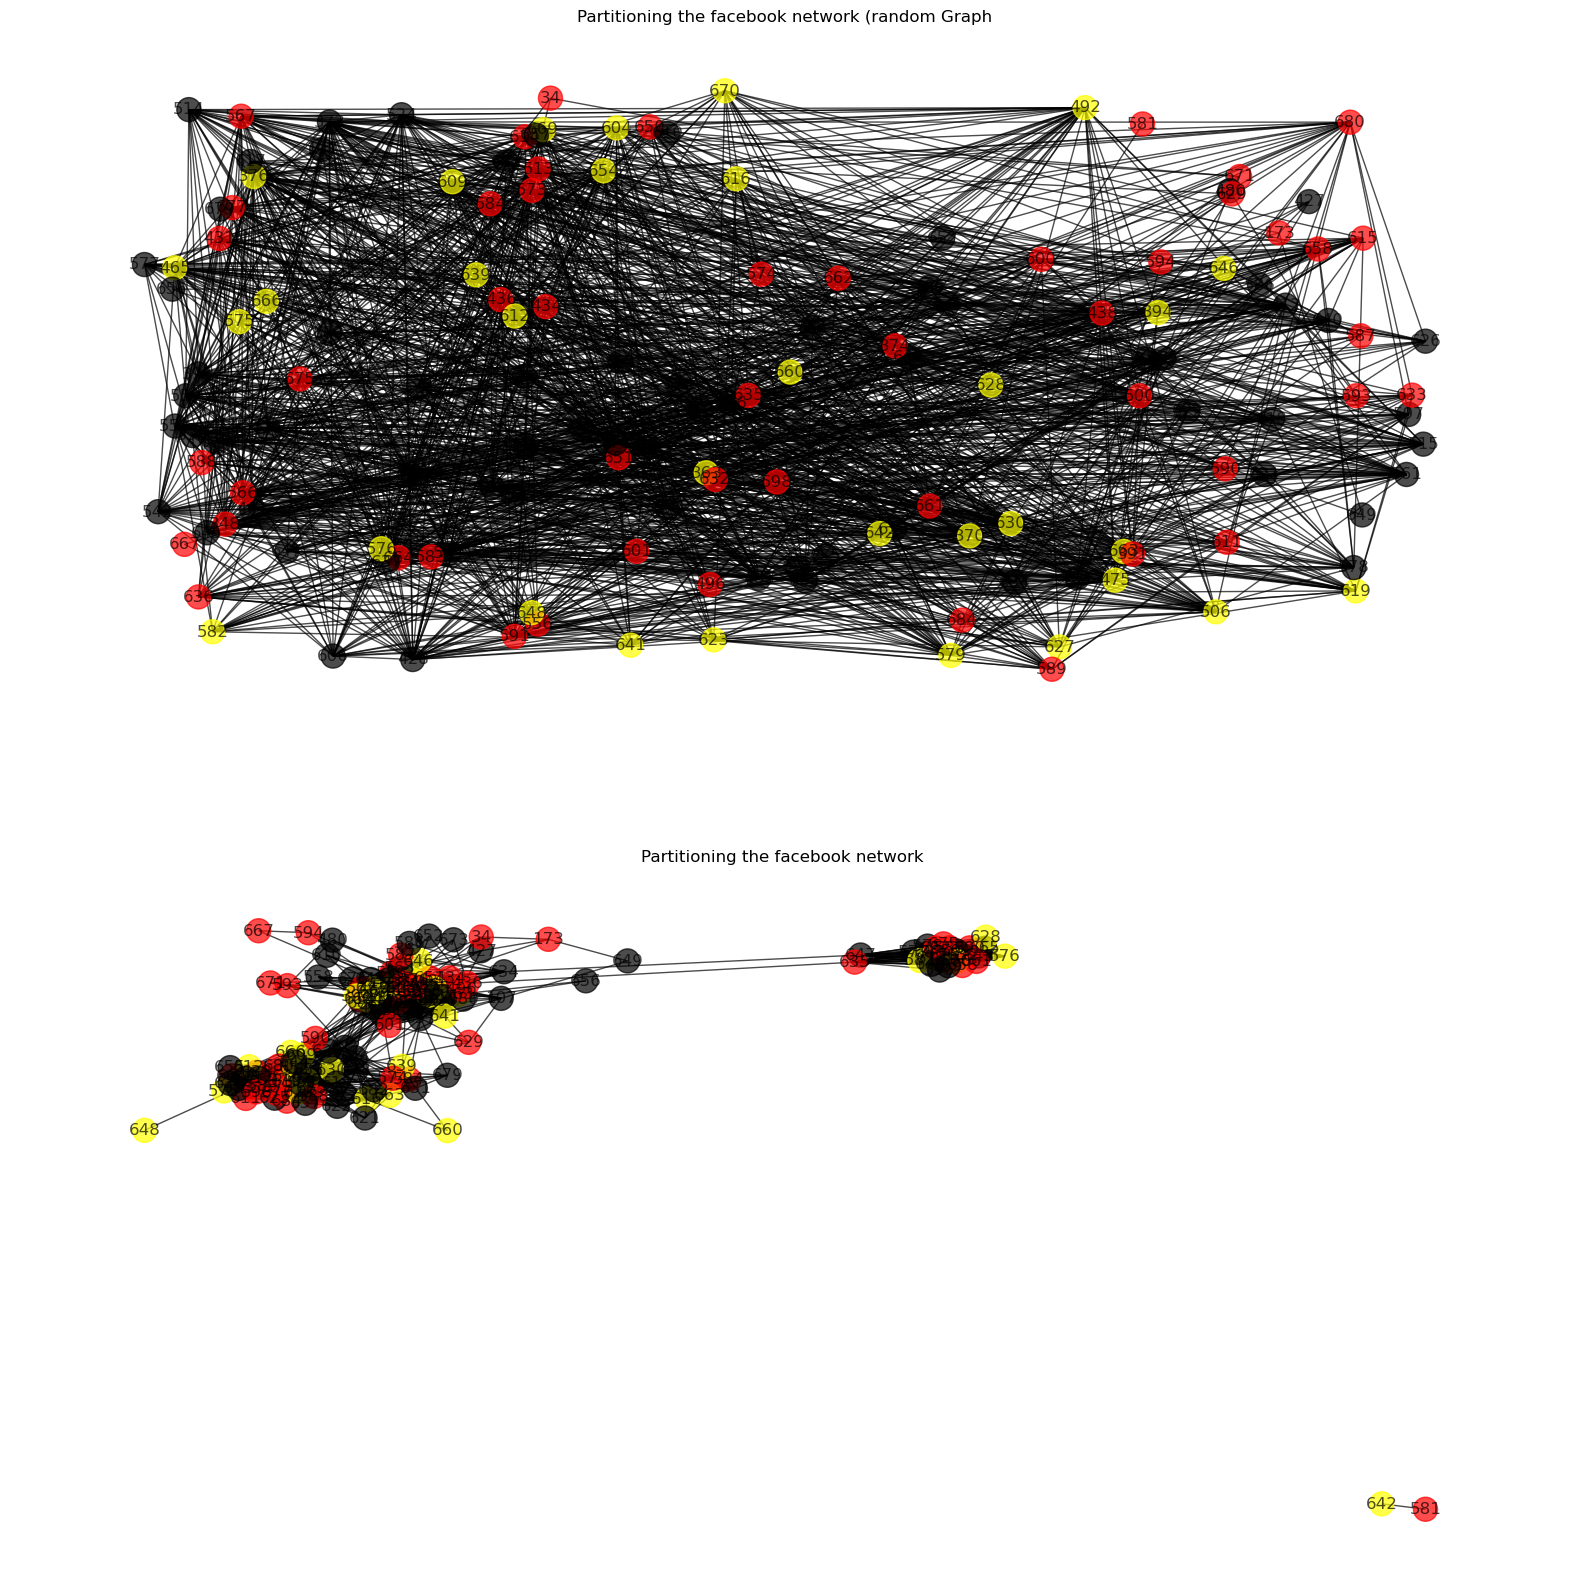

In [8]:
cut_conductance(sample3, sample4);
partition(facebook_network,sample3,sample4);

From the result we get differnt value for cut size and conductance since we take different sample of node.
| Answer | cut size | conductance |
| --- | --- | --- |
| a | 340 | 0.309 |
| b | 341 | 0.313 |


- cutsize:The cut size is the sum of the weights of the edges “between” the two sets of nodes.

- conductance:The conductance is the quotient of the cut size and the smaller of the volumes of the two sets.

The cut size and the conductance value is higher in **B**. So we can observe that (a)**sample1 & sample2** community is more "well-knit" than **sample3 & sample4**(a)

# (c) Please output the Laplacian matrix of Facebook-Ego dataset.



In [9]:
import numpy as np
import sys
# The columns of the returned laplacian matrix will be arranged the way my_nodeList is arranged
my_nodeList = list(facebook_network.nodes())
print(my_nodeList)

laplacian_matrix_FB = nx.laplacian_matrix(facebook_network, nodelist=my_nodeList)

# visualise the result
np.set_printoptions(threshold=sys.maxsize)
print(laplacian_matrix_FB.toarray())

[650, 647, 461, 544, 614, 515, 363, 348, 436, 428, 400, 591, 636, 630, 500, 524, 553, 561, 651, 597, 619, 664, 666, 606, 438, 370, 556, 373, 665, 583, 633, 680, 434, 566, 604, 683, 609, 376, 475, 465, 580, 632, 483, 579, 643, 681, 577, 578, 395, 663, 596, 676, 635, 671, 492, 567, 542, 637, 684, 627, 422, 412, 558, 589, 685, 575, 623, 625, 646, 654, 611, 431, 600, 582, 559, 378, 612, 644, 588, 599, 662, 645, 513, 617, 678, 640, 107, 394, 592, 603, 514, 615, 620, 506, 423, 601, 669, 628, 480, 629, 391, 563, 634, 590, 618, 587, 173, 496, 641, 661, 670, 649, 672, 573, 605, 653, 655, 374, 626, 677, 427, 616, 595, 584, 598, 658, 675, 576, 594, 622, 659, 631, 586, 682, 656, 610, 34, 593, 639, 657, 621, 673, 652, 574, 660, 648, 679, 667, 642, 581]
[[21 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1 -1 -1
   0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  -1 -1  0  0  0  0  0 -1 -1

# (d) Please return the list of cliques over the entire Facebook-Ego dataset.

In [10]:
x=list(nx.find_cliques(facebook_network))
print(x)

[[34, 348, 428], [34, 348, 173], [558, 423, 428, 373, 348, 553], [558, 423, 428, 373, 348, 465], [558, 423, 428, 373, 348, 412], [558, 423, 428, 373, 604, 465], [558, 423, 428, 373, 604, 412], [573, 592, 672, 653, 630], [573, 592, 672, 653, 654], [573, 592, 618, 684, 636, 597, 680, 611], [573, 592, 618, 684, 636, 597, 619, 630], [573, 592, 618, 684, 636, 598, 680], [573, 592, 618, 684, 636, 598, 619, 630], [573, 592, 618, 653, 636, 680, 666, 633], [573, 592, 618, 653, 636, 680, 597, 633], [573, 592, 618, 653, 636, 680, 597, 611], [573, 592, 618, 653, 636, 680, 685], [573, 592, 618, 653, 636, 680, 598], [573, 592, 618, 653, 636, 619, 633, 597], [573, 592, 618, 653, 636, 619, 630, 597], [573, 592, 618, 653, 636, 619, 630, 598], [573, 592, 618, 653, 636, 619, 630, 685], [573, 592, 618, 653, 636, 630, 666], [573, 592, 618, 653, 588, 619, 633], [573, 592, 618, 653, 588, 619, 685], [573, 592, 579, 622, 625, 684, 589, 623], [573, 592, 579, 654, 680, 609, 644, 617, 626, 605], [573, 592, 579, 6